In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
with open('./DATA/Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [9]:
df = pd.read_csv('./DATA/Ames_outliers_removed.csv')
df.head(5)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
df = df.drop('PID',axis=1)

In [12]:
df.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [14]:
100* df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [17]:
# a method for checking missing data
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Cars'),
  Text(2, 0, 'BsmtFin SF 1'),
  Text(3, 0, 'Garage Area'),
  Text(4, 0, 'BsmtFin SF 2'),
  Text(5, 0, 'Bsmt Unf SF'),
  Text(6, 0, 'Total Bsmt SF'),
  Text(7, 0, 'Bsmt Half Bath'),
  Text(8, 0, 'Bsmt Full Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Bsmt Qual'),
  Text(11, 0, 'Bsmt Cond'),
  Text(12, 0, 'BsmtFin Type 1'),
  Text(13, 0, 'BsmtFin Type 2'),
  Text(14, 0, 'Bsmt Exposure'),
  Text(15, 0, 'Garage Type'),
  Text(16, 0, 'Garage Qual'),
  Text(17, 0, 'Garage Cond'),
  Text(18, 0, 'Garage Yr Blt'),
  Text(19, 0, 'Garage Finish'),
  Text(20, 0, 'Lot Frontage'),
  Text(21, 0, 'Fireplace Qu'),
  Text(22, 0, 'Mas Vnr Type'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

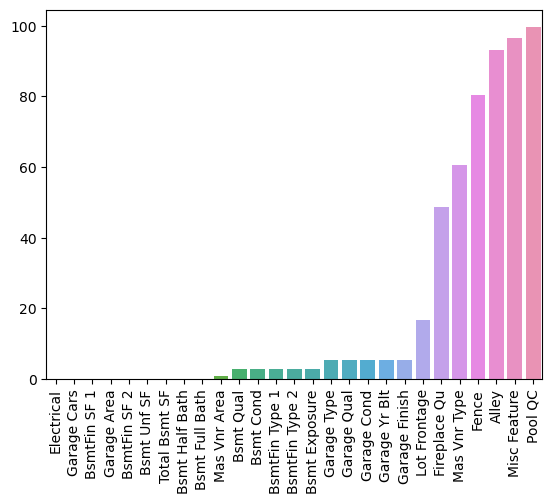

In [19]:
sns.barplot(x=percent_nan.index , y = percent_nan)
plt.xticks(rotation = 90)

(0.0, 1.0)

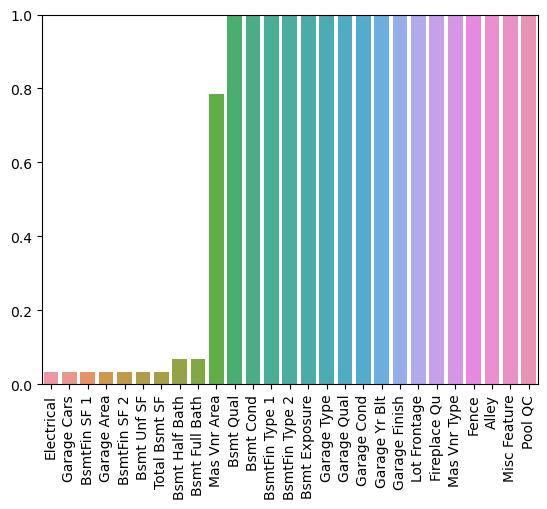

In [21]:
sns.barplot(x=percent_nan.index , y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [22]:
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

In [25]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [26]:
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [27]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [28]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [29]:
percent_nan = percent_missing(df)
percent_nan

Bsmt Unf SF        0.034188
Total Bsmt SF      0.034188
BsmtFin SF 2       0.034188
BsmtFin SF 1       0.034188
Bsmt Full Bath     0.068376
Bsmt Half Bath     0.068376
Mas Vnr Area       0.786325
Bsmt Qual          2.735043
Bsmt Cond          2.735043
BsmtFin Type 1     2.735043
BsmtFin Type 2     2.769231
Bsmt Exposure      2.837607
Garage Type        5.367521
Garage Yr Blt      5.401709
Garage Qual        5.401709
Garage Finish      5.401709
Garage Cond        5.401709
Lot Frontage      16.752137
Fireplace Qu      48.547009
Mas Vnr Type      60.615385
Fence             80.478632
Alley             93.230769
Misc Feature      96.410256
Pool QC           99.589744
dtype: float64

In [30]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

C:\Users\Kandarp\AppData\Local\Temp\ipykernel_3552\4012757213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
C:\Users\Kandarp\AppData\Local\Temp\ipykernel_3552\4012757213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


(0.0, 2.0)

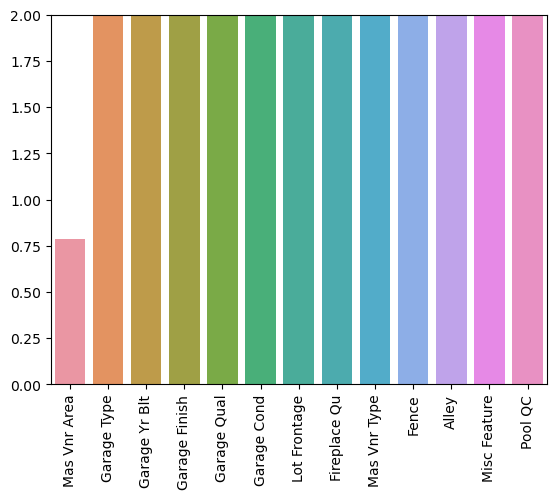

In [32]:
percent_nan = percent_missing(df)
percent_nan
sns.barplot(x=percent_nan.index , y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,2)

In [33]:
percent_nan

Mas Vnr Area      0.786325
Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Mas Vnr Type     60.615385
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

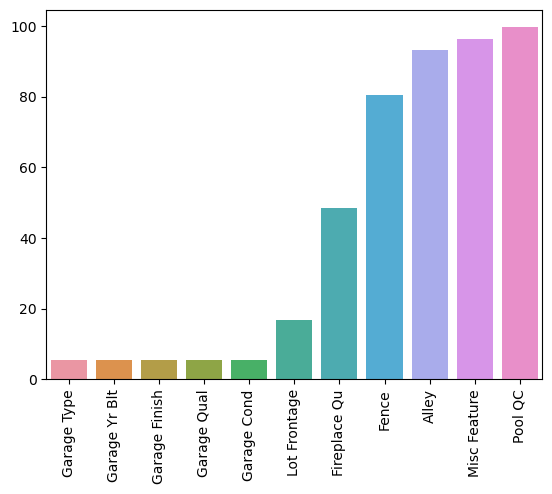

In [42]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Area'].fillna('None')
percent_nan = percent_missing(df)
percent_nan
sns.barplot(x=percent_nan.index , y = percent_nan)
plt.xticks(rotation = 90)
# plt.ylim(0,2)

In [40]:
# pd.set_option('display.max_columns', None)
# df[df['Mas Vnr Type'].isnull()].iloc[:1]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

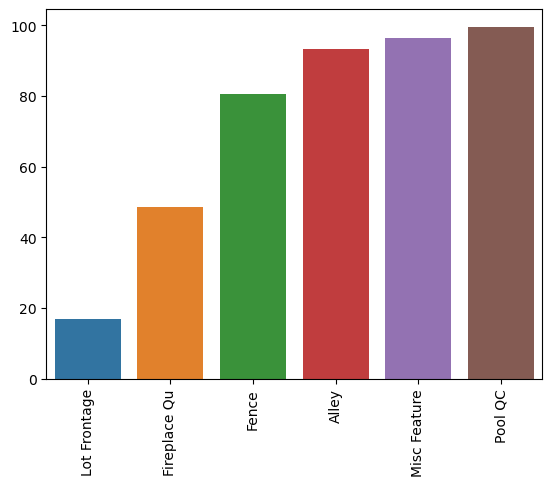

In [43]:
garage_str_cls = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[garage_str_cls] = df[garage_str_cls].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index , y = percent_nan)
plt.xticks(rotation = 90)

In [44]:
df = df.drop(['Fence','Alley','Misc Feature','Pool QC'],axis=1)

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

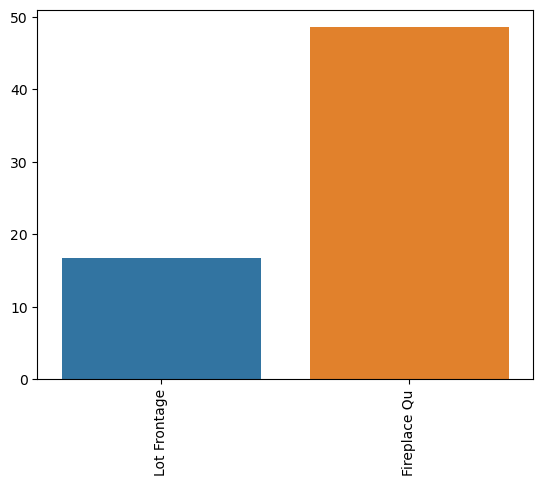

In [45]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index , y = percent_nan)
plt.xticks(rotation = 90)

In [46]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [47]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna('None')

In [54]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))
# remember - lambda value : value.fillna(value.mean()) is equals to - 
'''
def func(value):
    value.fillna(value.mean())
    #value.mean() - comes here as mean of the lot frontage value - from group by func.
'''

'\ndef func(value):\n    value.fillna(value.mean())\n    #value.mean() - comes here as mean of the lot frontage value - from group by func.\n'

In [58]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [59]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2253,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,239.0,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,0,9,2007,WD,Normal,330000
2785,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,0.0,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,None,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,0,6,2006,WD,Normal,137000
2889,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,0.0,0.0,Gd,TA,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,0,11,2006,WD,Normal,230000


In [60]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [61]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [62]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index , y = percent_nan)
plt.xticks(rotation = 90)

ValueError: min() arg is an empty sequence

In [ ]:
# Yohooo we did it